# Code

In [264]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

###### Missing Data

In [265]:
# Importing data from downloaded file obtained from ProPublica
police_data = pd.read_csv('allegations_202007271729.csv')
police_data.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


After looking through the dataset I found that some complainant ethnicity and age values were missing. In this step I will replace the missing values with "NaN" which will represent a null value/ a value that does not exist. There may be other missing values that I missed but I believe that they will not have a large effect on the results since I will be focused mostly on the complainants.

1041 complainant ethnicities were missing as can be seen below:

In [266]:
police_data['complainant_ethnicity'].value_counts()

Black              17114
Hispanic            6424
White               2783
Unknown             1041
Other Race           677
Asian                532
Refused              259
American Indian       64
Name: complainant_ethnicity, dtype: int64

In [267]:
# replacing Unknowns with NaN
police_data['complainant_ethnicity']= (police_data['complainant_ethnicity']
                                       .apply(lambda x: np.NaN if x =='Unknown'else x))

Below are the ages of the complainants at the time of the incident. As we can see there are some surpising numbers such as 0, -1 and -4301. There are also other small numbers which are most likely errors, but I am not sure, in order to avoid changing the data too much, I will only replace the numbers that are obviously wrong.

In [268]:
police_data['complainant_age_incident'].value_counts().index

Float64Index([   26.0,    24.0,    30.0,    25.0,    23.0,    21.0,    28.0,
                 27.0,    22.0,    29.0,    19.0,    20.0,    32.0,    34.0,
                 33.0,    31.0,    35.0,    18.0,    36.0,    37.0,    17.0,
                 41.0,    38.0,    39.0,    42.0,    40.0,    45.0,    44.0,
                 43.0,    16.0,    46.0,    48.0,    15.0,    49.0,    47.0,
                 50.0,    52.0,    51.0,    53.0,    14.0,    54.0,    55.0,
                 57.0,    56.0,    58.0,    13.0,    59.0,    62.0,    60.0,
                 61.0,    63.0,    12.0,    65.0,    67.0,    64.0,    68.0,
                 70.0,    66.0,    75.0,    11.0,    71.0,    72.0,    69.0,
                 73.0,    76.0,    79.0,    10.0,    74.0,    81.0,    80.0,
                 77.0,    -1.0,    78.0,    87.0,     9.0,     8.0,   101.0,
                  2.0,     0.0,    86.0, -4301.0,     3.0,     6.0,     1.0,
                 90.0,    83.0,    84.0,     7.0,    88.0],
             dty

In [269]:
#replacing 'missing' values with NaN
police_data['complainant_age_incident'] = (police_data['complainant_age_incident']
                                           .apply(lambda x: np.NaN if x==0.0 or x==-4301.0 or x== -1.0 else x))

###### Configuring Dates

In this section I will combine the dates to a more useable format that will make it easier to use in further analysis.

In [270]:
police_data[['month_received', 'year_received', 'month_closed',
       'year_closed']].head()

,month_received,year_received,month_closed,year_closed
0,7,2019,5,2020
1,11,2011,8,2012
2,11,2011,8,2012
3,7,2012,9,2013
4,8,2018,2,2019


In [271]:
#selecting necessary columns, renaming for easier conversion to datetime
received = (police_data[['month_received', 'year_received']]
            .rename(columns={'month_received':'month','year_received':'year'}))
# creating placeholder for day, does not represent actual day, needed to convert date to datetime
received['day'] = 1
# adding new column indicating date received
police_data['date_received'] = pd.to_datetime(received)

In [272]:
#selecting necessary columns, renaming for easier conversion to datetime
received = (police_data[['month_closed', 'year_closed']]
            .rename(columns={'month_closed':'month','year_closed':'year'}))
# creating placeholder for day, does not represent actual day, needed to convert date to datetime
received['day'] = 1
# adding new column indicating date investiagtion closed
police_data['date_closed'] = pd.to_datetime(received)

In [273]:
police_data[['date_received', 'date_closed']].head()

,date_received,date_closed
0,2019-07-01,2020-05-01
1,2011-11-01,2012-08-01
2,2011-11-01,2012-08-01
3,2012-07-01,2013-09-01
4,2018-08-01,2019-02-01


### EDA 

###### Ethnicity EDA

In [135]:
# Graph of Complainant Ethnicity 
complainant_ethnicity = police_data['complainant_ethnicity'].value_counts()
complainant_ethnicity.to_frame()

,complainant_ethnicity
Black,17114
Hispanic,6424
White,2783
Other Race,677
Asian,532
Refused,259
American Indian,64


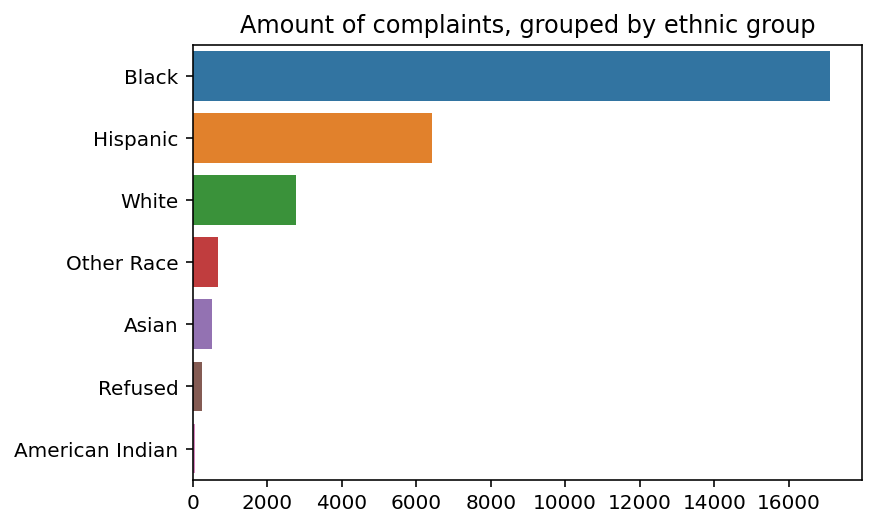

In [180]:
ethnic_count = (sns.barplot(y=complainant_ethnicity.index,x=complainant_ethnicity.values,orient='h')
                .set_title('Amount of complaints, grouped by ethnic group'))

As we can see on the graph and table above, the majority of complainants were Black and Hispanic. The graph is very surprising considering black people had about 16000 complaints which is about 4 times more than white people had. This suggests that black people are more likely to have a negative experience with a police officer, which in all honesty does not seem very surprising considering the history between the police and Black Americans.

In [284]:
#calculcating amount of days between the day the report was received and the day it was closed
police_data['length_open'] = police_data['date_closed'] - police_data['date_received']
police_data['length_open'].mean()

Timedelta('296 days 06:26:57.507045760')

Above I calculated the average amount of time it took the CCRB to resolve a case. On average it took about 296 days for the CCRB to resolve a case. This number might be lower or higher depending on the day of the month the report was submitted, but since we don't have that information I will use 296 for our analysis. 

It is important to note that according to ProPublica, the non-profit organization that obtained the police data, the CCRB (New York City’s Civilian Complaint Review Board) has limited powers and relies heavily on the NYPD to turn over evidence needed for the investigation, but oftentimes they don't comply even though they have a legal obligation to do so. As a result, the CCRB is limited in their ability to investigate every single case extensively, which provides an explanation as to why it takes them a long time to conduct an investigation and reach a verdict.

In [285]:
# creating a new column only obtaining the amount of days from when the report was received
# and when it was closed
police_data['days_open'] = police_data['length_open'].dt.days

In [286]:
ethnicity_days_open = (police_data.groupby(['complainant_ethnicity'])['days_open']
                       .agg([np.mean,np.std,np.max,'count']).sort_values(by='mean',ascending=False))
ethnicity_days_open

,mean,std,amax,count
complainant_ethnicity,,,,
Black,320.058607,147.757478,3348,17114
Hispanic,308.947385,133.407104,1246,6424
Other Race,291.090103,124.401606,1127,677
White,284.872080,128.375707,1064,2783
American Indian,271.093750,108.618558,485,64
Refused,265.722008,134.178523,639,259
Asian,258.345865,125.066539,610,532


Text(0.5, 1.0, 'Distribution of lengths that the complaint stayed open, grouped by ethnic group')

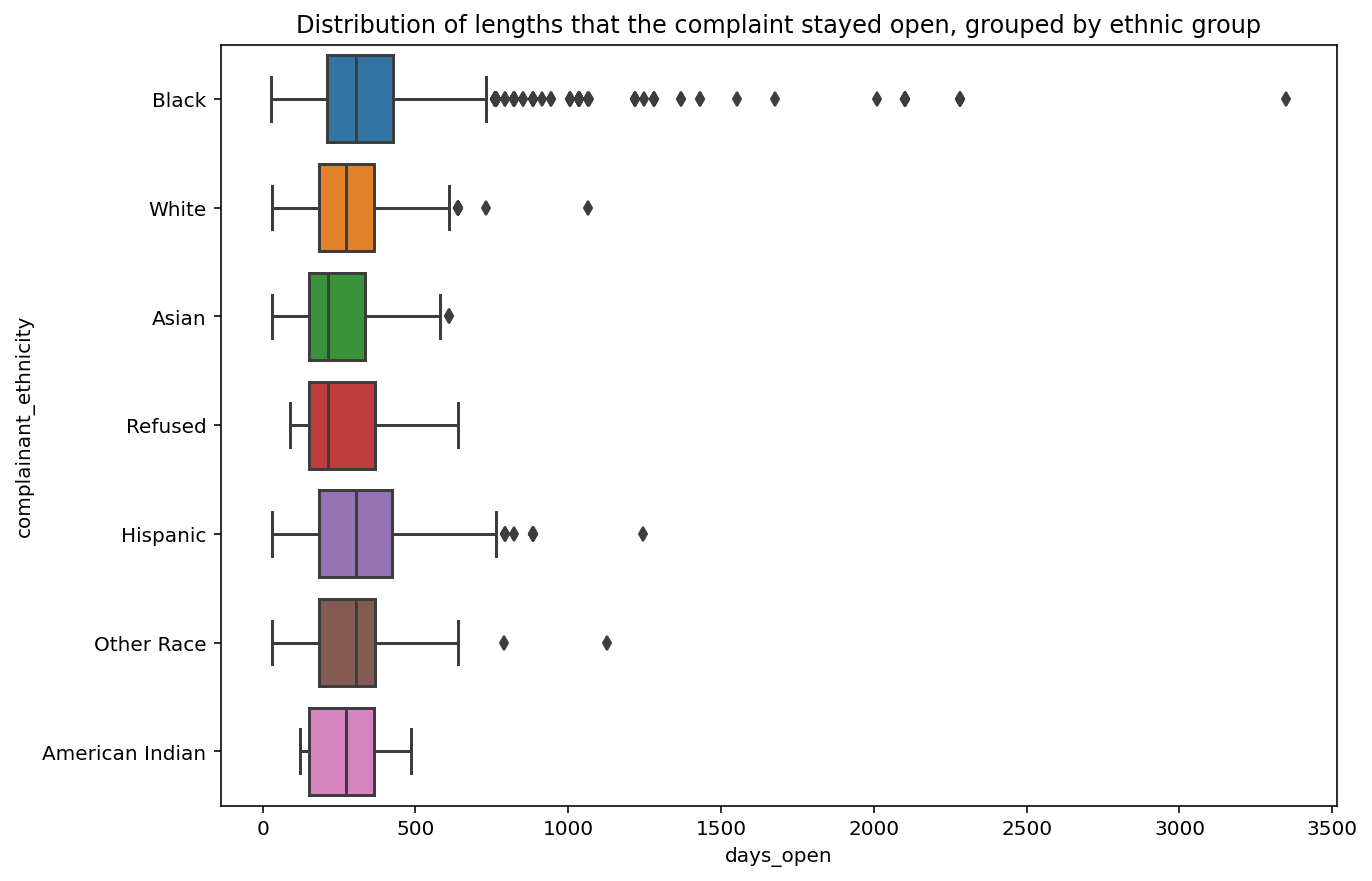

In [287]:
plt.figure(figsize=(10,7))
(sns.boxplot(y=police_data['complainant_ethnicity'],x=police_data['days_open'])
.set_title('Distribution of lengths that the complaint stayed open, grouped by ethnic group'))

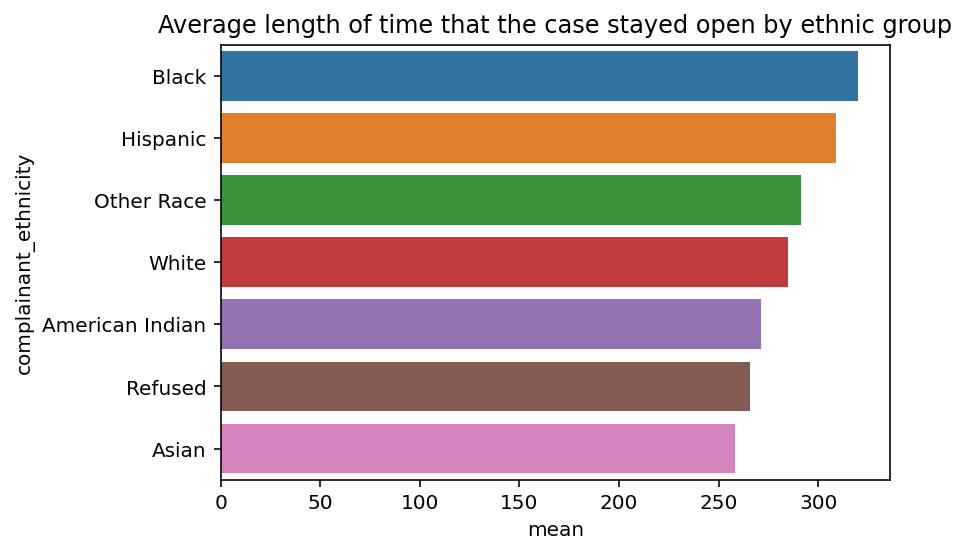

In [288]:
days_plot = (sns.barplot(y = ethnicity_days_open.index, x = ethnicity_days_open['mean'],orient='h')
             .set_title('Average length of time that the case stayed open by ethnic group'))

As we can see on the table and graphs above, Black people had to wait longer on average than every other ethnic group. Black people had to wait on average about 320 days, about 10 months, for their cases to be solved with one person having to wait 3348 days, about 9 years for their case to be solved. This suggests that race could have an impact on the amount of time that the complaint is open. However, it is important to note that these distributions could look very different in reality because there were 1041 people who did not provide a ethnic group and 259 people who refused to give their ethnic group.

###### Age EDA

In [289]:
police_data['complainant_age_incident'].mean()

32.64419370663676

As we can see above the average age of complainants is about 32 which is not very surprising considering those are the people who are outside more often as opposed to older and younger people.

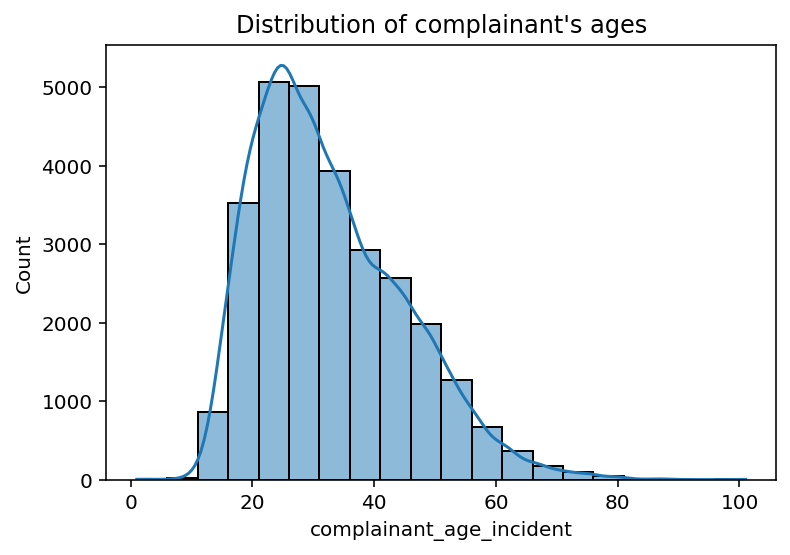

In [315]:
ages = police_data['complainant_age_incident']
ages_hist = sns.histplot(ages,bins=20,kde=True).set_title("Distribution of complainant's ages")

In [292]:
# getting bin cutoffs of histogram
age_range = np.histogram(police_data['complainant_age_incident'].dropna(),20)[1]
bins = []
# combining upper and lower thresholds to create range of ages
for i in range(len(age_range)-1):
    bins.append([age_range[i],age_range[i+1]])
    

In [293]:
# function for determing which age range a person belongs to
def age_range(age, bins=bins):
    for lower,upper in bins:
        if age >=lower and age < upper:
            return (lower,upper)
        elif upper == age:
            return (lower,upper)

In [294]:
# applying function to complainant age column
police_data['age_range'] = police_data['complainant_age_incident'].apply(age_range)

In [295]:
police_data[['complainant_age_incident','age_range']].head()

,complainant_age_incident,age_range
0,38.0,"(36.0, 41.0)"
1,26.0,"(21.0, 26.0)"
2,26.0,"(21.0, 26.0)"
3,45.0,"(41.0, 46.0)"
4,16.0,"(11.0, 16.0)"


In [296]:
stats_age = (police_data.groupby(by='age_range')['days_open'].agg([np.mean,np.max,'count'])
             )

stats_age.head()

,mean,amax,count
age_range,,,
"(1.0, 6.0)",419.400000,485,5
"(6.0, 11.0)",361.878049,823,41
"(11.0, 16.0)",325.095057,2283,1315
"(16.0, 21.0)",333.721778,2011,4004
"(21.0, 26.0)",311.688889,1431,5265


Text(0, 0.5, 'Days case stayed open')

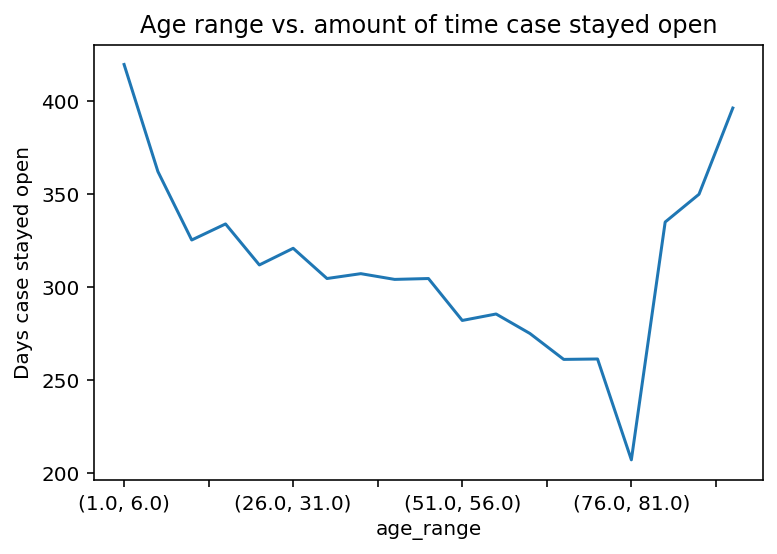

In [297]:
stats_age.sort_values(by='age_range',ascending=True)['mean'].plot()
plt.title('Age range vs. amount of time case stayed open')
plt.ylabel('Days case stayed open')

As we can see on the table and graph above, the amount of time that the case stayed open goes down as age incresases with outliers on both ends. It is important to note that those outliers or potentially mistakes in the data cannot be taken at face value because they are not very reliable considering there are only 5 people contributing to the leftmost outlier and only 2 people are contributing to the rightmost outlier. That being said if we consider the average amount of time for the age groups that we have more data for, we can see a downward trend as age increases, which suggests that the amount of time a complaint stays open is affected by the age, altough I cannot be certain unless I perform more tests in the future.

### Assessment of Missingness

In this section I will be assessing the missingness of certain parts of the data in order to figure out whether it is missing completely at random or if there is a variable that is correlated with the missing variable. I will begin by looking for a column that has non-trivial missingness.  

In [208]:
police_data['complainant_ethnicity'].isna().sum() / len(police_data)

0.16502787936926674

As we can see above about 16% of the complainant's ethnicity is missing. Since this is a large portion of the data, which can have a large impact on my previous results, I will now analyze the dependency of this missingness on other columns by performing multiple permutation tests.

First, I will run a permutation test to analyze the dependency of missingness in complainant ethnicity on the fado type column. The fado type column represent the types of accusations the complainants provide the CCRB, as we can see below.  

In [261]:
ethnicity_fado = police_data[['complainant_ethnicity','fado_type']]
ethnicity_missing_fado = ethnicity_fado.assign(**{'is_null':police_data['complainant_ethnicity'].isnull()})
ethnicity_missing_fado.head()

,complainant_ethnicity,fado_type,is_null
0,Black,Abuse of Authority,False
1,Black,Discourtesy,False
2,Black,Offensive Language,False
3,Black,Abuse of Authority,False
4,NaN,Force,True


Text(0, 0.5, 'percentage')

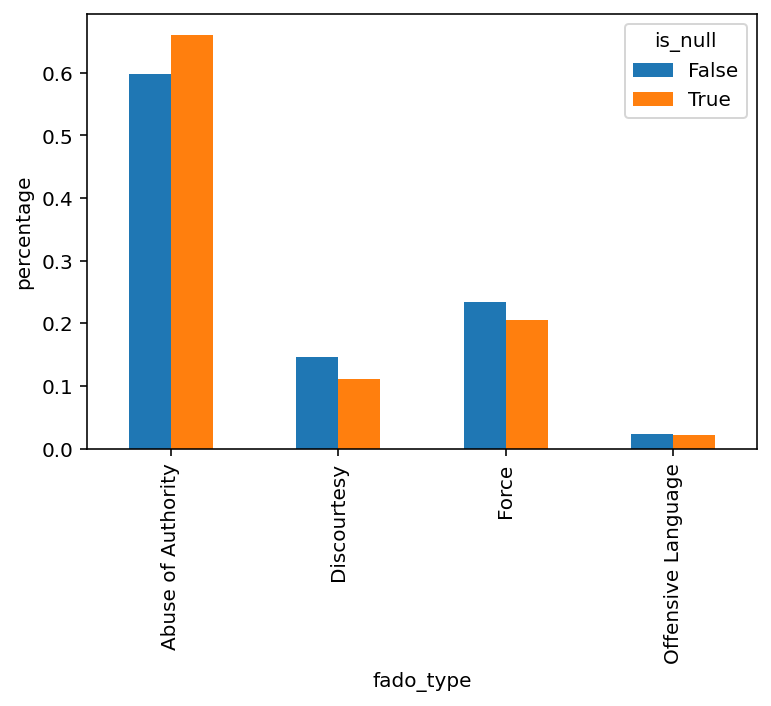

In [314]:
pt_fado = (pd.pivot_table(index='is_null',columns='fado_type',aggfunc='size',data = ethnicity_missing_fado)
           .apply(lambda x:x/x.sum(),axis=1))
pt_fado.T.plot(kind='bar')
pt_fado
plt.ylabel('percentage')

Upon initial glance it seems that there is little to no dependence of missingness on the fado type but in order to be sure I will now perform a permutation test and I will use the Total Variation Distance as my test statistic since I am dealing with categorical variables.

In [299]:
# function for performing permutation test to analyze missingness of complainant ethnicity on other columns
def perm_test(column,police_data):
    # obtaining null values of complainant ethnicity
    ethnicity_null = police_data['complainant_ethnicity'].isnull()
    # combining column and column containing information about wheter or not ethnicity is null
    testing_df = police_data[[column]].assign(**{'is_null':ethnicity_null})
    #obtaining total variation Distance
    original_tvd = find_tvd(testing_df,column)
    
    tracker=[]
    for _ in range(500):
        #shuffling values
        shuffled_col = testing_df[column].sample(replace=False,frac=1).reset_index(drop=True)
        shuffled_df = testing_df.assign(**{'shuffled_col':shuffled_col})
        # finding tvd of shuffled dataframe
        shuffled_tvd = find_tvd(shuffled_df,'shuffled_col')
        tracker.append(shuffled_tvd)
    # calculating tvd
    p_val = np.count_nonzero(tracker >= original_tvd) / 500
    return p_val, original_tvd, tracker
    

In [301]:
# helper function for finding tvd 
def find_tvd(df, column):
    pvt_col = (pd.pivot_table(index='is_null',columns=column,aggfunc='size',data = df,values=None)
               .fillna(0).apply(lambda x:x/x.sum(),axis=1))
    tvd = pvt_col.diff().iloc[-1].abs().sum() / 2
    return tvd

In [302]:
# performing permuation test on fado_type
fado_type_test = perm_test('fado_type',police_data)

In [303]:
observed_tvd_fado = fado_type_test[1]
observed_tvd_fado

0.0631465055300546

Text(0.5, 0, 'tvds')

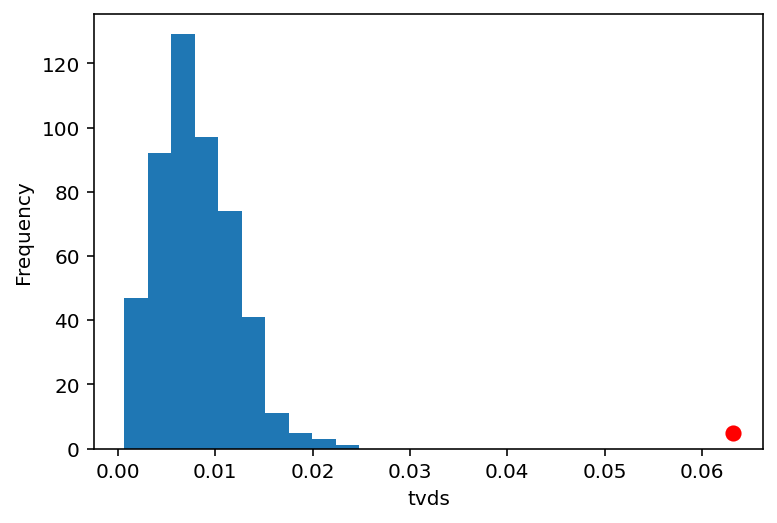

In [304]:
pd.Series(fado_type_test[2]).plot(kind='hist')
plt.scatter(observed_tvd_fado,5,color='red',s=50)
plt.xlabel('tvds')

In [305]:
p_val = fado_type_test[0]
print('p-value = ' + str(p_val))

p-value = 0.0


As we can see above I did not observe a tvd as large as the one I observed initially. I got a p-value of 0 which means that if I use a 1% significance value, I would reject the null hypothesis and would conclude that there is a strong likelikelihod that the distributions of missing values and non-missing values of complainant ethnicity are not from the same distribution. This in the end suggests that there is a missingness dependency on the fado type.

Now I will observe the month_received column and test wheter or not other it influences the missingess of the complainant ethnicity. 

In [306]:
months = (police_data[['complainant_ethnicity','month_received']]
          .assign(**{'is_null':police_data['complainant_ethnicity'].isnull()}))
months.head()

,complainant_ethnicity,month_received,is_null
0,Black,7,False
1,Black,11,False
2,Black,11,False
3,Black,7,False
4,NaN,8,True


Text(0, 0.5, 'percentage')

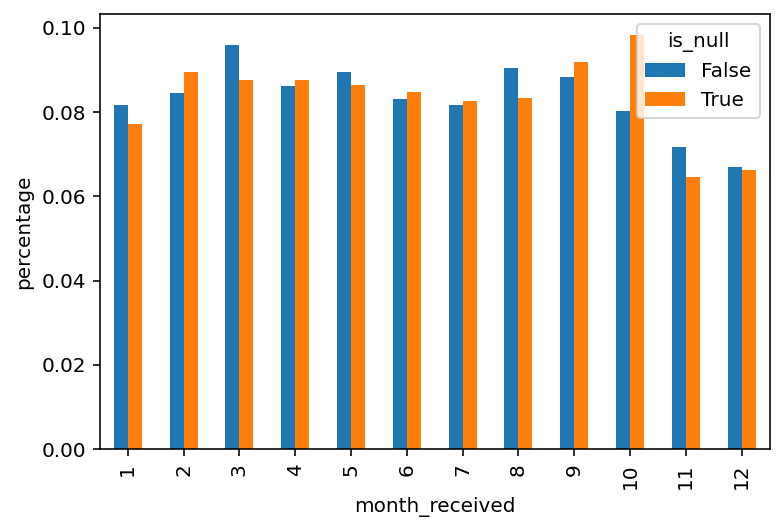

In [313]:
pt_date = (pd.pivot_table(index='is_null',columns='month_received',aggfunc='size',data = months)
           .apply(lambda x:x/x.sum(),axis=1))
pt_date.T.plot(kind='bar')
pt_date
plt.ylabel('percentage')

In [308]:
#permutation test on month received
date_test = perm_test('month_received',police_data)

p-value = 0.018


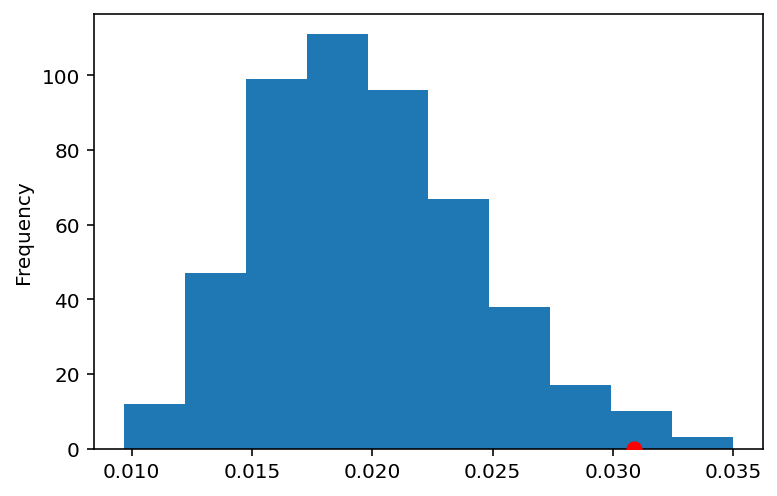

In [309]:
pd.Series(date_test[2]).plot(kind='hist')
plt.scatter(date_test[1],0,color='red',s=50,zorder=50)
#p-value
print('p-value = ' +str(date_test[0]))

As we can see from the results above, the missigness of complainant ethnicity has little to no dependece on the month the complaint was received since my p-value .018 > .01. This indicates that wheter or not the complainant ethnicity is missing cannot be predicted easily by the month, meaning that it is MCAR in this case. However, I cannot be entirely sure that this is the case since our p-value is very close to .01. Regardless, I can conclude that there is little to no dependence. 

### Hypothesis Test

For this section of my report I will performing a permutation test and I will use the Kolomogorov-Smirnov Statistic.

H_0: The distribution of time the case stayed open is the same among Black people and White People

H_1: The distribution of time the case stayed open is not the same among Black people and White People

I will use a 1% significance level

In [263]:
htest = police_data[['complainant_ethnicity','days_open']]
htest = htest.loc[(htest['complainant_ethnicity'] == 'Black') | (htest['complainant_ethnicity'] =='White')]
htest.head()

,complainant_ethnicity,days_open
0,Black,305
1,Black,274
2,Black,274
3,Black,427
5,White,153


complainant_ethnicity
Black    AxesSubplot(0.125,0.125;0.775x0.755)
White    AxesSubplot(0.125,0.125;0.775x0.755)
Name: days_open, dtype: object

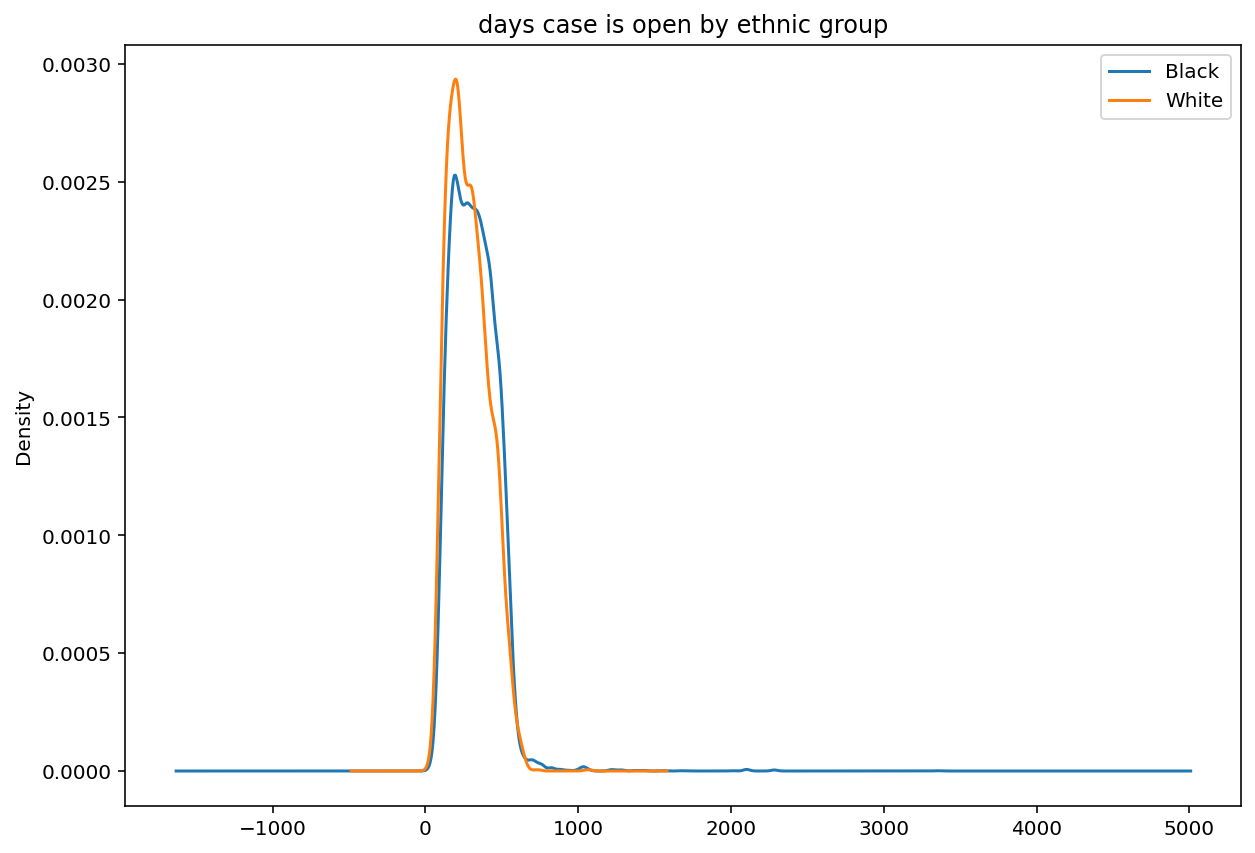

In [310]:
plt.figure(figsize=(10,7))
(htest.groupby('complainant_ethnicity')['days_open']
 .plot(kind='kde',legend = True,title='days case is open by ethnic group'))

Since the distributions look very similar I do not think a difference of means test will determine if the distributions are different. Instead, I will use the Kolmogorov-Smirnov Statistic to test my null hypothesis.

It is important to note that the following imported function computes the Kolmogorv-Smirnov Statistic and a p-value *after* it has performed a permuation test, so there is no need for me to manually do it.

In [445]:
# importing function needed to compute Kolmogorov-Smirnov Statistic
from scipy.stats import ks_2samp

In [457]:
grpA = htest.loc[htest['complainant_ethnicity'] == 'Black','days_open']
grpB = htest.loc[htest['complainant_ethnicity'] == 'White','days_open']
ks_2samp(grpA, grpB)

KstestResult(statistic=0.1076324389078065, pvalue=1.3190706275596996e-24)

As we can see by the results I got a really small p-value and if I compare it to my confidence level I see that **1.32 * 10^-24** < .01 which means that I **reject the null hypothesis**. This means that even though I can't confirm that both distributions came from different distributions, it is very likely that they did, concluding that both groups did not wait the same amount of time for their cases to be closed.

### References:
“We’re Publishing Thousands of Police Discipline Records That New York Kept Secret for Decades,” ProPublica, July 26, 2020 https://www.propublica.org/article/nypd-civilian-complaint-review-board-editors-note

“The NYPD Files,” ProPublica, July 26, 2020
https://projects.propublica.org/nypd-ccrb/